<a href="https://colab.research.google.com/github/Syamabintafaruque/Hello_Github_Faruque/blob/main/Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Submitted To:

Md. Sifat Ar Salan

Assistant Professor

Department of Statistics

Jahangirnagar University


Submitted By:

Syama Binta Faruque

ID: 20231084

Batch: 10th

Section: B

##Data Loading and Exploration:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ML_Assignment

/content/drive/MyDrive/ML_Assignment


In [3]:
!pwd

/content/drive/MyDrive/ML_Assignment


Housing prices-Dataset Loading

In [4]:
import pandas as pd
df = pd.read_csv('Housing - Housing.csv')

Dataset's Structure, dimention and summary

In [5]:
#Dimention
print("Number of rows:",len(df.axes[0]))
print("Number of columns:",len(df.axes[1]))
#data type
print(df.dtypes)
#summary
print(df.describe())

Number of rows: 545
Number of columns: 13
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.

Non integer value handling

In [6]:
#Encoding categorical variables
status = pd.get_dummies(df[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)
status
data = pd.concat([df, status], axis = 1)
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

data.shape

(545, 14)

##Data Splitting:

In [7]:
#Train-test Spliting.
from sklearn.model_selection import train_test_split
#independent variable
X = data.drop(['price'],axis=1)
#dependent variable
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

##Data pre processing:

In [8]:
#checking missing values
nan_count = data.isna().sum()
print(nan_count)

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
parking                            0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
mainroad_yes                       0
guestroom_yes                      0
basement_yes                       0
hotwaterheating_yes                0
airconditioning_yes                0
prefarea_yes                       0
dtype: int64


In [18]:
#scaling or normalizing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Encoding categorical variable is done before.

array([[0.16701031, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39656357, 0.6       , 0.33333333, ..., 0.        , 1.        ,
        1.        ],
       [0.32371134, 0.4       , 0.        , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.26426117, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32646048, 0.4       , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.25773196, 0.6       , 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

##Model selection:

In [19]:
#Model selection and training.
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
model = {
    'Linear Regressor' : LinearRegression(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge()
}

##Model Evaluation:

In [20]:
#Prediction
pred ={}

for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

Results for Linear Regressor : 
Mean Square Error : 1754318687330.6638
R2 Score : 0.6529242642153184


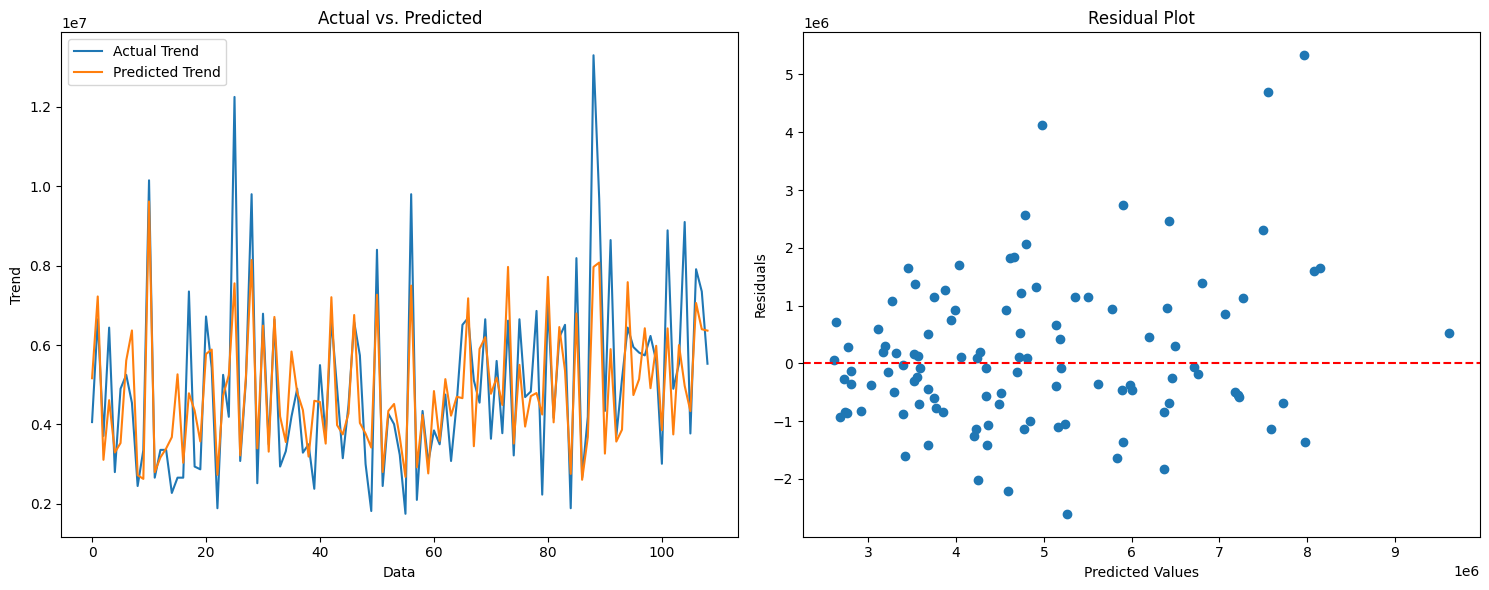

Results for Lasso Reg : 
Mean Square Error : 1754321266292.506
R2 Score : 0.6529237539915572


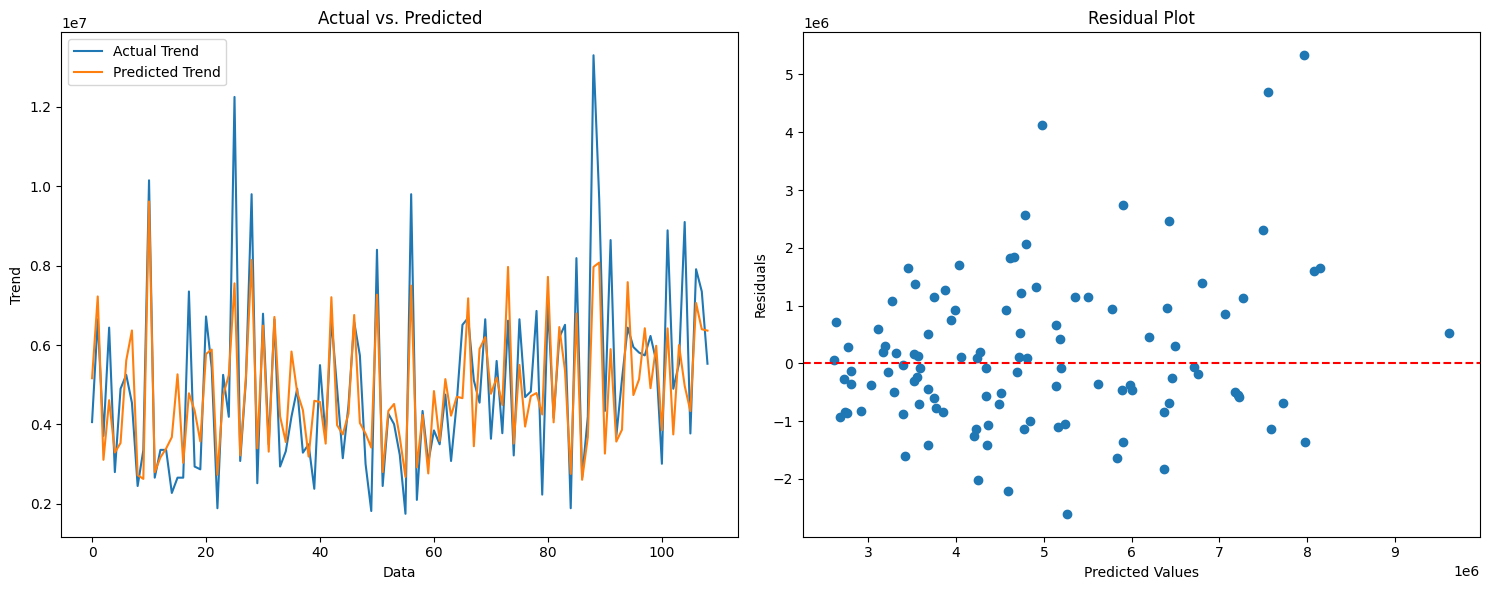

Results for Ridge Reg : 
Mean Square Error : 1756474279575.2856
R2 Score : 0.6524978002155007


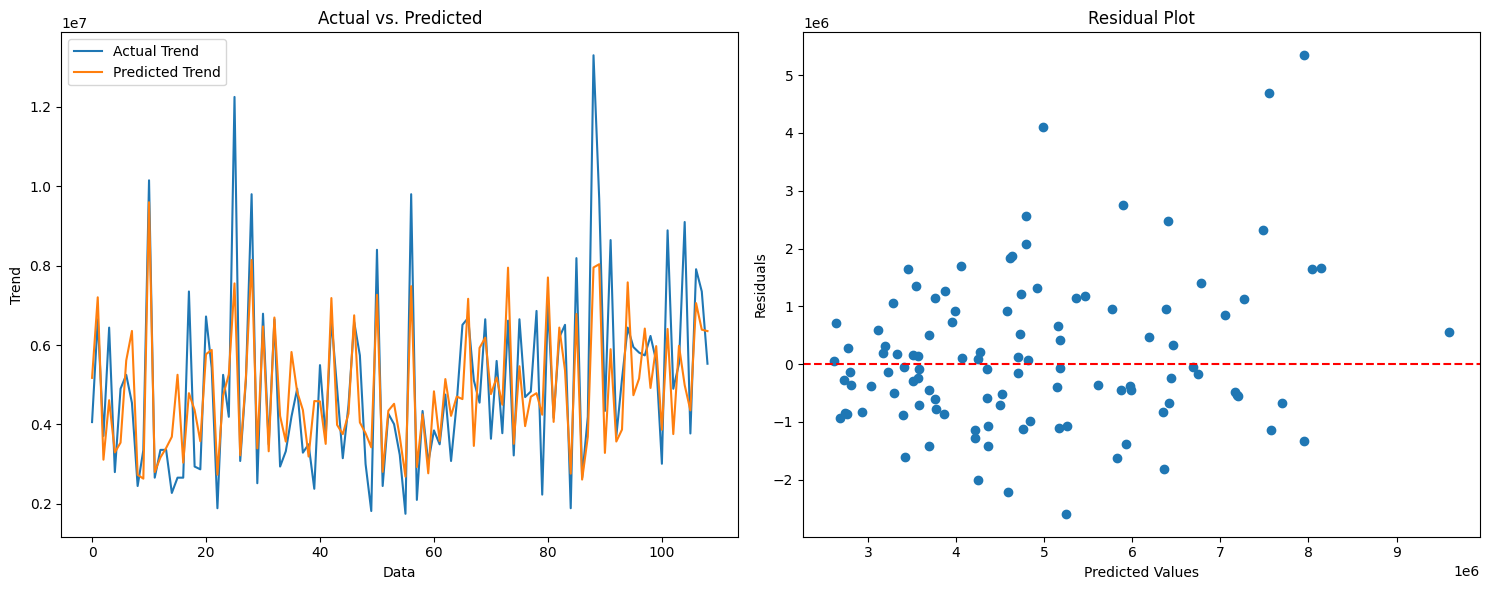

In [21]:
#Evaluating the models using suitable regression metrics.
#Comparing the performance of the models.
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
acc= {}
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Error : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

Hyper parameter tuning with GridsearchCV

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.model_selection import GridSearchCV

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

parameters = {'alpha':[1, 10]}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

#fit the grid search
Ridge_reg.fit(X,y)

# best estimator
print(Ridge_reg.best_estimator_)

# best model
best_model = Ridge_reg.best_estimator_
best_model.fit(X,y)

Ridge(alpha=10)


Ridge(alpha=10)

alpha: number of parameter

best model alpha=10

##Visualization:

Results for Linear Regressor : 


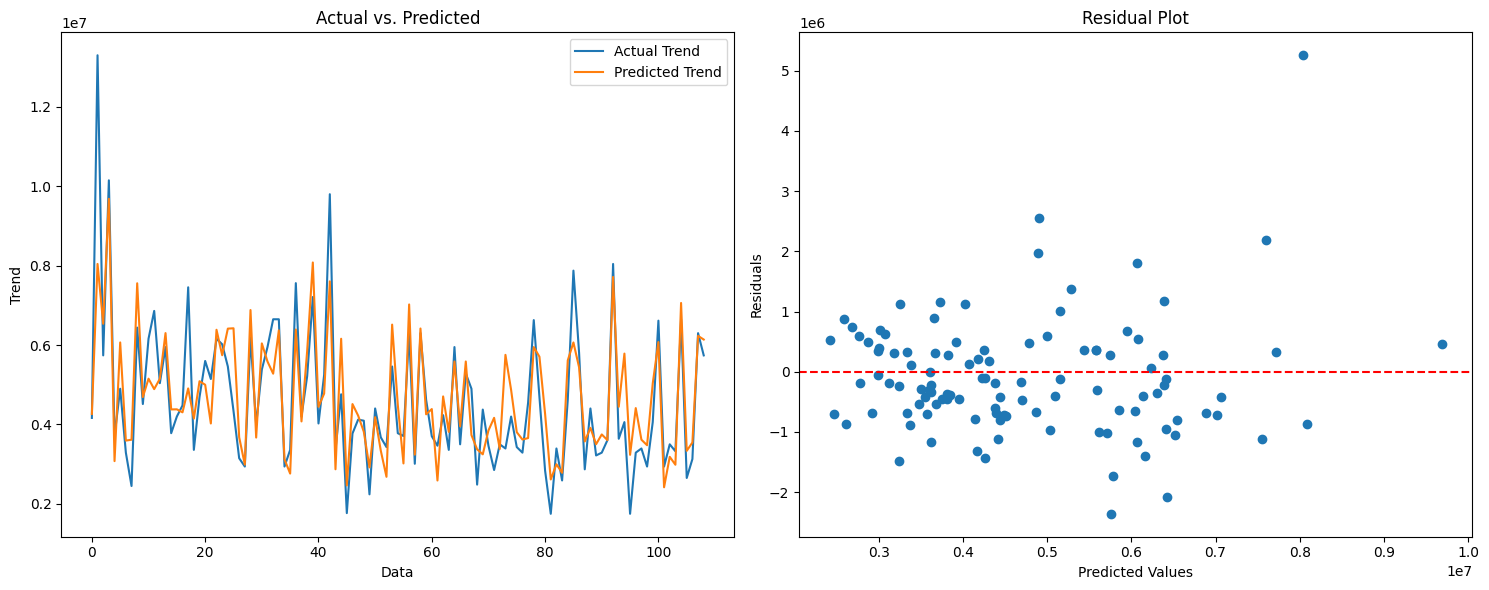

Results for Lasso Reg : 


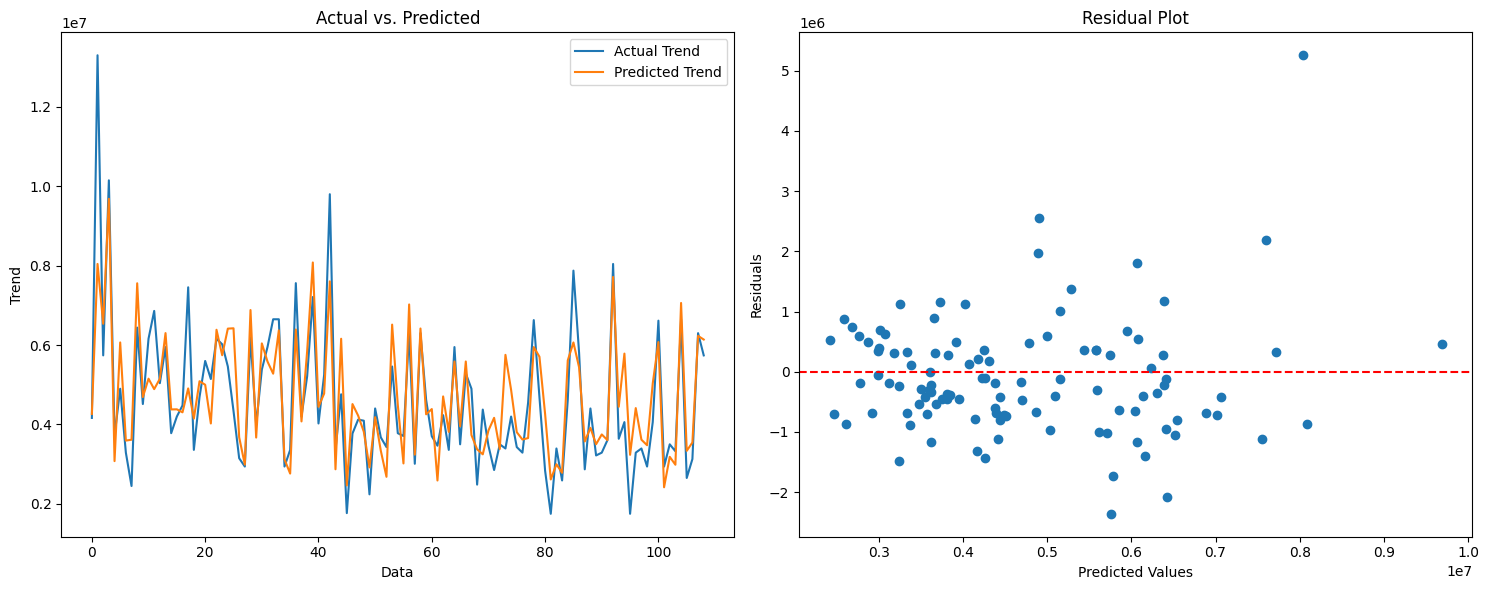

Results for Ridge Reg : 


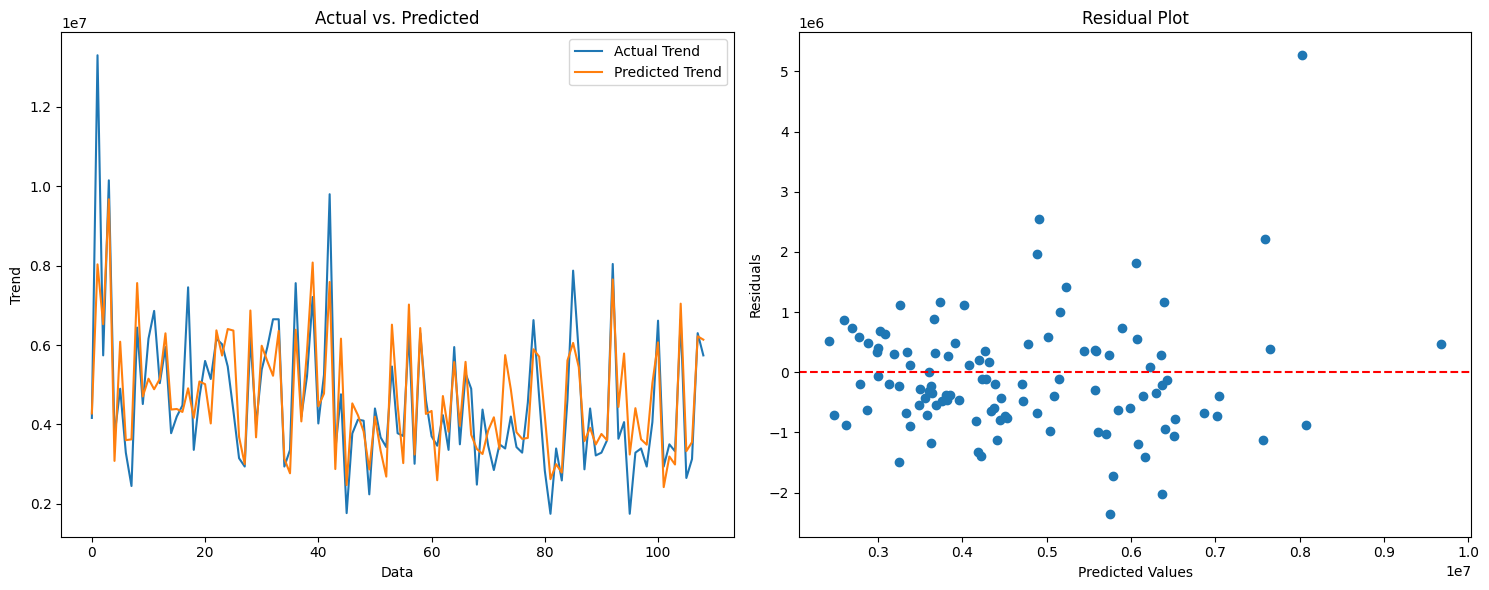

In [ ]:
#Visualizing the predicted values.
acc= {}
for name, y_pred in pred.items():
    print(f"Results for {name} : ")
    plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    # Plot Residuals
    residuals = y_test - y_pred

    plt.subplot(1, 2, 2)
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

In [ ]:
train_split = [0.5,0.55,0.6,0.65,0.7,0.75,0.8]
LR_mean = []
LR_r2 = []
lasso_mean = []
lasso_r2 = []
ridge_mean = []
ridge_r2 = []

for t in train_split:
  print("train data size",t*100,"%")
  X = data.drop(['price'],axis=1) #independent variable
  y = data['price'] #dependent variable
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=t,random_state=42)
  #scaling or normalizing
  scaler = MinMaxScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)
  model = {
    'Linear Regressor' : LinearRegression(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge()
  }

  pred ={}

  for name, model in model.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      pred[name]=y_pred

  for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    if name == "Linear Regressor":
      LR_mean.append(mse)
      LR_r2.append(r2)
    elif name == "Lasso Reg":
      lasso_mean.append(mse)
      lasso_r2.append(r2)
    else:
      ridge_mean.append(mse)
      ridge_r2.append(r2)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Error : {mse}")
    print(f"R2 Score : {r2}")



train data size 50.0 %
Results for Linear Regressor : 
Mean Square Error : 1283005739844.1323
R2 Score : 0.6538449579274087
Results for Lasso Reg : 
Mean Square Error : 1283005111092.1177
R2 Score : 0.6538451275647481
Results for Ridge Reg : 
Mean Square Error : 1280589473667.5686
R2 Score : 0.6544968667178624
train data size 55.00000000000001 %
Results for Linear Regressor : 
Mean Square Error : 1302144791810.8127
R2 Score : 0.6406953275047974
Results for Lasso Reg : 
Mean Square Error : 1302143892099.2607
R2 Score : 0.6406955757648731
Results for Ridge Reg : 
Mean Square Error : 1299126955877.9187
R2 Score : 0.6415280479198634
train data size 60.0 %
Results for Linear Regressor : 
Mean Square Error : 1290226503821.8882
R2 Score : 0.6487361940567695
Results for Lasso Reg : 
Mean Square Error : 1290226079815.4578
R2 Score : 0.6487363094924019
Results for Ridge Reg : 
Mean Square Error : 1288304436378.108
R2 Score : 0.6492594763824556
train data size 65.0 %
Results for Linear Regressor 

Plot of Linear regression mean square error


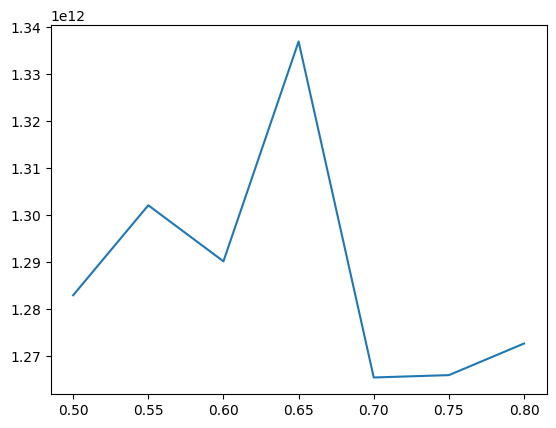

In [ ]:
print("Plot of Linear regression mean square error")
plt.plot(train_split,LR_mean)

Plot of Linear regression R2 score


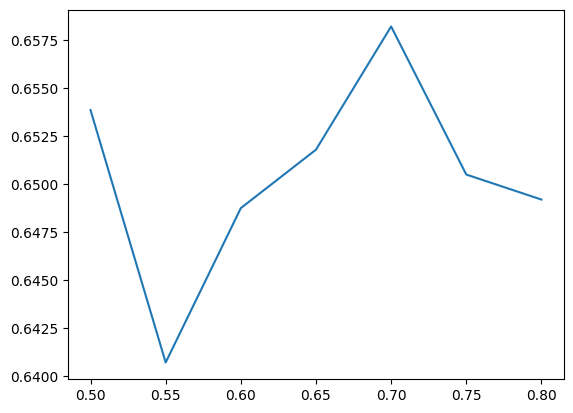

In [ ]:
print("Plot of Linear regression R2 score")
plt.plot(train_split,LR_r2)

Plot of Lasso Regression mean square error


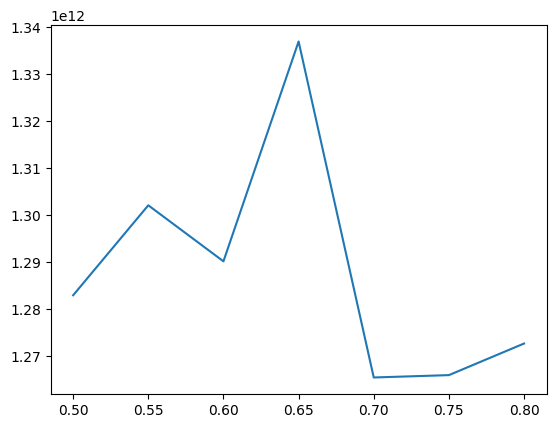

In [ ]:
print("Plot of Lasso Regression mean square error")
plt.plot(train_split,lasso_mean)

Plot of Lasso Regression R2 score


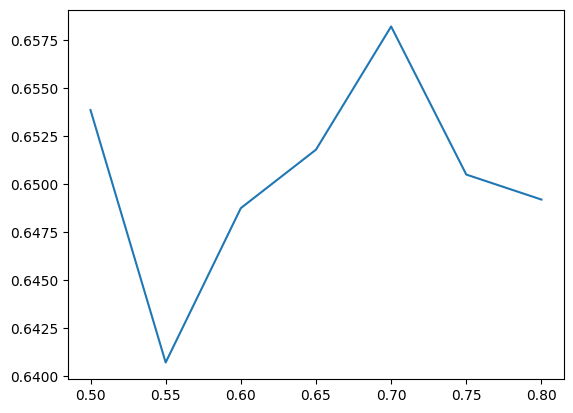

In [ ]:
print("Plot of Lasso Regression R2 score")
plt.plot(train_split,lasso_r2)

Plot of Ridge Regression mean square error


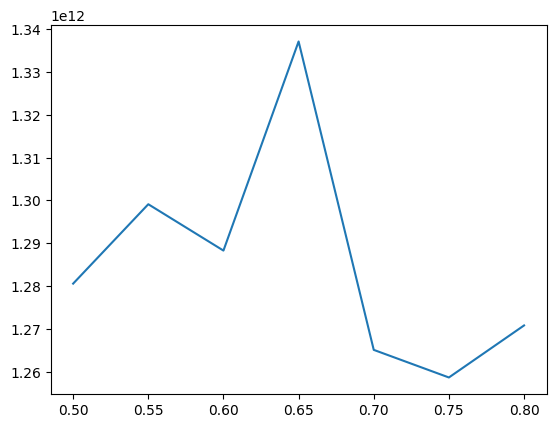

In [ ]:
print("Plot of Ridge Regression mean square error")
plt.plot(train_split,ridge_mean)

Plot of Ridge Regression R2 score


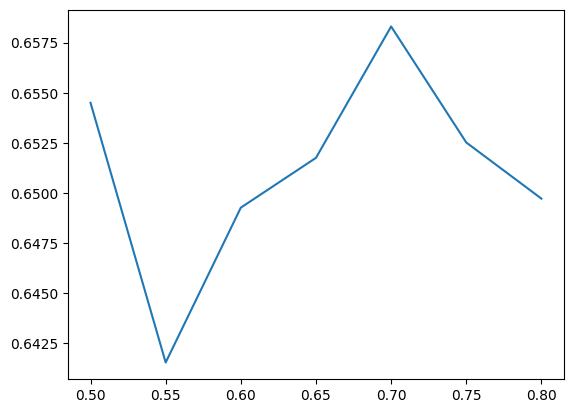

In [ ]:
print("Plot of Ridge Regression R2 score")
plt.plot(train_split,ridge_r2)

##CONCLUSION:
The analysis of housing price prediction using various regression models revealed valuable insights into the
dataset&#39;s predictive capabilities. Among the three models—Linear Regression, Ridge Regression,
and Lasso Regression—the Linear Regression model emerged as the most effective, displaying the
highest R-squared (R2) score of approximately 0.652924. This finding signifies that about 65% of the variability
in housing prices could be explained by the model. The predictive performance of the Lasso Regression (R2 ≈
0.652923) and Ridge Regression (R2 ≈ 652497) models was slightly lower, indicating their comparative limitations
in capturing the variability in housing prices. Challenges encountered during the analysis may involve
potential model overfitting or underfitting, especially in the case of the Ridge Regression model with a slightly lower R2
score. Improvements could entail exploring additional features or employing more sophisticated ensemble like Hyperparameter tuning-GridSearchCV(where used Alpha =10)
methods to enhance predictive accuracy and robustness in housing price predictions. Overall, the analysis
highlighted the strengths of Linear Regression while acknowledging areas for potential refinement in
modeling for more accurate predictions of housing prices.